# PROBLEM STATEMENT

*Implementation of XG Boosting in Python*

1. Import Libraries
2. Load the Dataset and Pre-Processing
3. Implement Extreme Gradient Descent
4. Model Predictions and Accuracy

The Dataset is a ***Red-Wine Quality***. First we perform normal gradient boosting, and then perform XG boosting and compare accuracy.

### Module 1 : Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve

<hr>

### Module 2 : Loading the Dataset, Pre-Processing and Data Preparation

In [ ]:
df = pd.read_csv("./winequality-red.csv")

print(df['quality'].value_counts(), end=" ")

def quality_to_label(quality):
    if quality <= 5:
        return 0
    else:
        return 1

df['quality_class'] = df['quality'].apply(quality_to_label)

df.head(2)

print(df.shape)
df = df.dropna(axis=0, how='any')
print(df.shape)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 (1599, 13)
(1599, 13)


Data Preparation and Scaling

In [ ]:
X = df.drop(['quality','quality_class'], axis = 'columns')
Y = df['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, end="\t")
print(y_train.shape)

print(X_test.shape, end="\t")
print(y_test.shape)

(1119, 11)	(1119,)
(480, 11)	(480,)


In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

<hr>

### Module 3 : Simple Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=10,
    random_state = 101
)

gbc.fit(X_train, y_train)
preds_gbc = gbc.predict(X_test)

print(preds_gbc[0:20])

[1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test, preds_gbc)
precision = precision_score(y_test, preds_gbc)
recall = recall_score(y_test, preds_gbc)
f1score = f1_score(y_test, preds_gbc)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, preds_gbc)

print(f"ACCURACY : {accuracy} \t PRECISION : {precision} \t RECALL : {recall} \t F1 SCORE : {f1score}")

ACCURACY : 0.7604166666666666 	 PRECISION : 0.7794117647058824 	 RECALL : 0.7940074906367042 	 F1 SCORE : 0.7866419294990724


<hr>

### Module 4: Extreme Gradient (XG) Boosting

In [ ]:
xg = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=1,
    max_depth=10,
    random_state = 101
)

xg.fit(X_train, y_train)
preds_xg = xg.predict(X_test)

print(preds_xg[0:20])

[0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test, preds_xg)
precision = precision_score(y_test, preds_xg)
recall = recall_score(y_test, preds_xg)
f1score = f1_score(y_test, preds_xg)
fpr_xg, tpr_xg, _ = roc_curve(y_test, preds_xg)

print(f"ACCURACY : {accuracy} \t PRECISION : {precision} \t RECALL : {recall} \t F1 SCORE : {f1score}")

ACCURACY : 0.78125 	 PRECISION : 0.7892857142857143 	 RECALL : 0.8277153558052435 	 F1 SCORE : 0.8080438756855577


<hr>

### Module 5 : Comparison of Both the Models

<ipython-input-71-a470593037ef>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


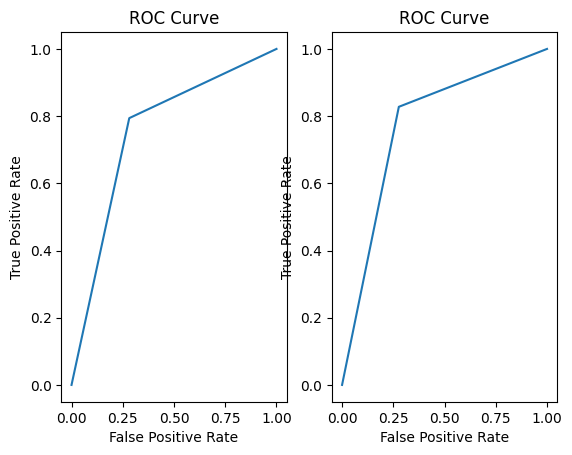

In [ ]:
_, ax = plt.subplots()

plt.subplot(1,2,1)
# ax.set_xticklabels(np.arange(0,1,0.1))

plt.plot(fpr_gbc, tpr_gbc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

plt.subplot(1,2,2)

plt.plot(fpr_xg, tpr_xg)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

<hr><hr>